In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import joblib as jl

# Input data files are available in the read-only "../input/" directory

import warnings
# ignore warnings
warnings.filterwarnings("ignore")

In [2]:
# read csv (comma separated value) into data
data = pd.read_csv(r'E:\Python Projects\University Student Prediction/dataset.csv')
print(plt.style.available) # look at available plot styles
plt.style.use('ggplot')

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [3]:
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [5]:
data.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,6.886980,1.727848,9.899186,0.890823,2.531420,1.254521,12.322107,16.455244,7.317812,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,5.298964,1.313793,4.331792,0.311897,3.963707,1.748447,9.026251,11.044800,3.997828,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,3.000000,5.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,8.000000,1.000000,10.000000,1.000000,1.000000,1.000000,13.000000,14.000000,6.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,12.000000,2.000000,13.000000,1.000000,1.000000,1.000000,22.000000,27.000000,10.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,18.000000,9.000000,17.000000,1.000000,17.000000,21.000000,29.000000,34.000000,32.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [6]:
data.drop(data.index[(data["Target"] == "Other")], axis = 0, inplace = True)

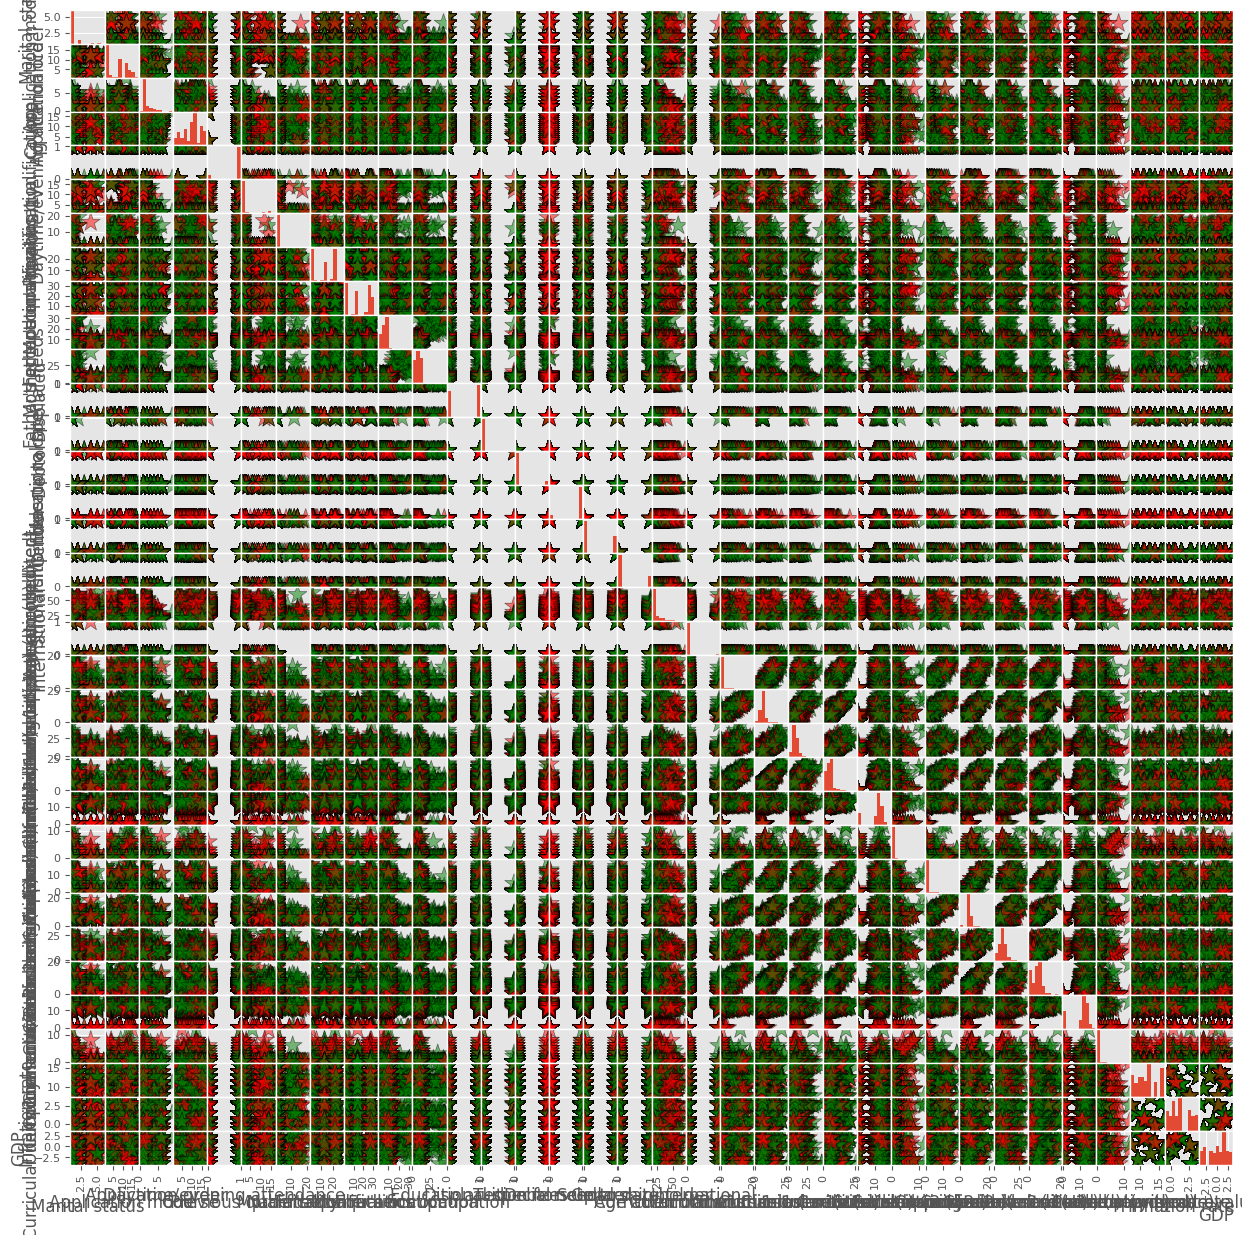

In [7]:
color_list = ["red" if i=="Dropout" else "green" for i in data.loc[:,"Target"]]
pd.plotting.scatter_matrix(data.loc[:, data.columns != "class"],
                                       c=color_list,
                                       figsize= [15,15],
                                       diagonal="hist",
                                       alpha=0.5,
                                       s = 200,
                                       marker = "*",
                                       edgecolor= "black")
plt.show()

Graduate    2209
Dropout     1421
Enrolled     794
Name: Target, dtype: int64

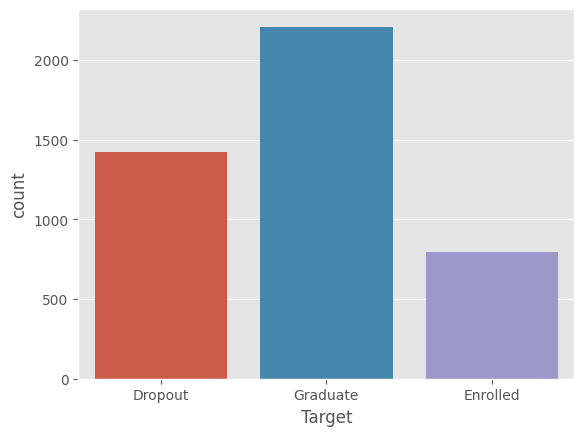

In [8]:
sns.countplot(x="Target", data=data)
data.loc[:,'Target'].value_counts()

In [9]:
data.drop(data.index[(data["Target"] == "Enrolled")],axis=0,inplace=True)

Graduate    2209
Dropout     1421
Name: Target, dtype: int64

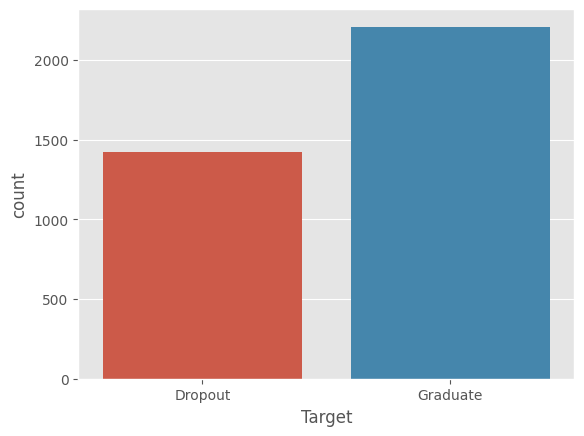

In [10]:
sns.countplot(x="Target", data=data)
data.loc[:,'Target'].value_counts()

In [11]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
x,y = data.loc[:,data.columns != 'Target'], data.loc[:,'Target']
knn.fit(x,y)
prediction = knn.predict(x)
print('Prediction: {}'.format(prediction))

Prediction: ['Graduate' 'Dropout' 'Dropout' ... 'Graduate' 'Graduate' 'Graduate']


In [12]:
# train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)
knn = KNeighborsClassifier(n_neighbors = 3)
x,y = data.loc[:,data.columns != 'Target'], data.loc[:,'Target']
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
#print('Prediction: {}'.format(prediction))
print('With KNN (K=3) accuracy is: ',knn.score(x_test,y_test)) # accuracy

With KNN (K=3) accuracy is:  0.8337924701561065


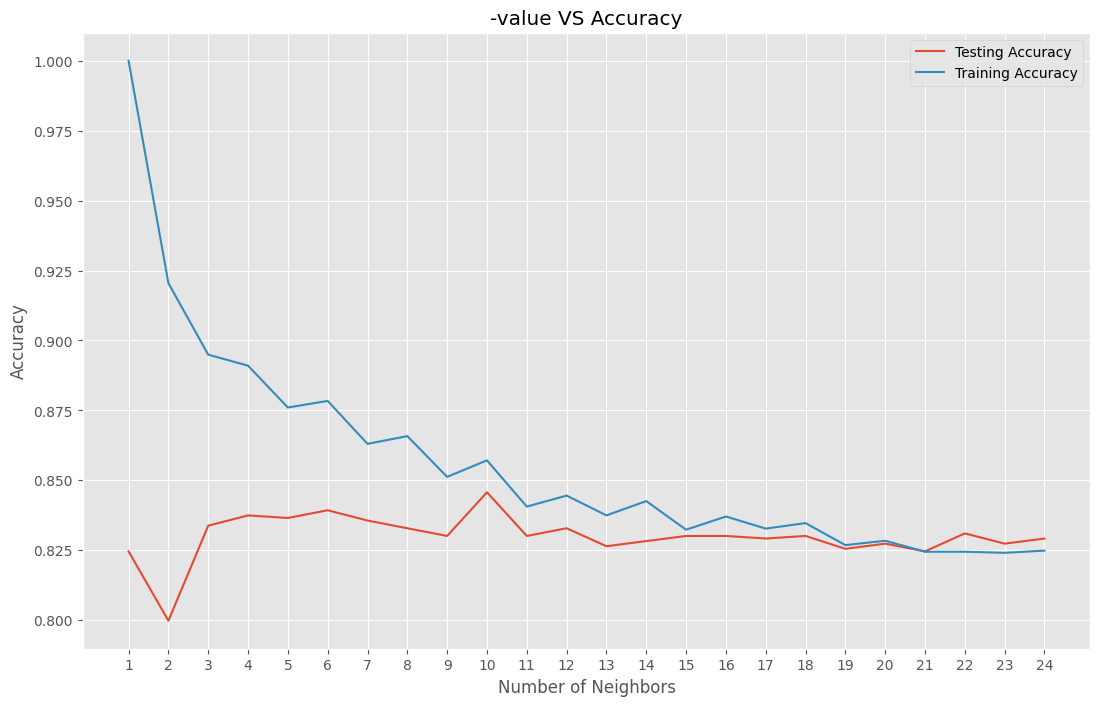

Best accuracy is 0.8457300275482094 with K = 10


In [13]:
# Model complexity
neig = np.arange(1, 25)
train_accuracy = []
test_accuracy = []
# Loop over different values of k
for i, k in enumerate(neig):
    # k from 1 to 25(exclude)
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(x_train,y_train)
    #train accuracy
    train_accuracy.append(knn.score(x_train, y_train))
    # test accuracy
    test_accuracy.append(knn.score(x_test, y_test))

# Plot
plt.figure(figsize=[13,8])
plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
plt.plot(neig, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.savefig('graph.png')
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

In [14]:
from sklearn.linear_model import LogisticRegression #Logistic regression - accuracy
from sklearn.metrics import accuracy_score

lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(x_train, y_train)

pred = lr_clf.predict(x_test)
print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")

Accuracy Score: 91.83%


In [15]:
from sklearn.svm import SVC #Support Vector Machine (SVM)- accuracy

svm_clf = SVC(kernel='rbf', gamma=0.1, C=1.0)
svm_clf.fit(x_train, y_train)

pred = svm_clf.predict(x_test)
print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")

Accuracy Score: 60.79%


In [16]:
from sklearn.tree import DecisionTreeClassifier #Decision Tree - accuracy


tree_clf = DecisionTreeClassifier(random_state=40)
tree_clf.fit(x_train, y_train)

pred = tree_clf.predict(x_test)
print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")

Accuracy Score: 86.96%


In [ ]:
#save the model to disk
